In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [42]:
def reader(path):
    # Open the file and read the lines
    with open(path, "r") as file:
        # Iterate over the lines
        for line in file:
            # Strip leading and trailing whitespace
            line = line.strip()
            # Check if the line contains column names
            if line.startswith("#DOY.Frac"):
                # Split the line by whitespace and append to the columns list
                columns = line[1:].strip().split("\t")
                break  # Stop reading lines after finding column names

    # Read the data into a DataFrame, skipping the first 6 rows of comments
    return pd.read_csv(path, sep='\t', skiprows=6, names=columns)

In [50]:
d = reader('./data/DASH_FLOW_240404_090206.dat')

In [57]:
d.keys()

Index(['DOY.Frac', 'YYYY', 'Secs', 'DO_Sh', 'DO_Smp', 'DO_Press', 'DO_Ht_T',
       'DO_Ht_Pwr', 'DO_Fl_T', 'DO_X_T', 'HO_Sh_D_Fl', 'HO_Sh', 'HO_Smp',
       'HO_Press', 'HO_RH', 'HO_T', 'HO_Ht_T', 'HO_Ht_Pwr', 'HO_Fl_T',
       'HO_X_T', 'HO_DP_Cl', 'HO_DP_Lk', 'HM_Sh_D_Fl', 'HM_Sh', 'HM_Xs',
       'HM_Smp_Xs', 'HM_Press', 'HM_RH', 'HM_T', 'HM_Ht_T', 'HM_Ht_Pwr',
       'HM_Fl_T', 'HM_X_T', 'HM_DP_Cl', 'HM_DP_Lk', 'H2O_T', 'H2O_Pwr',
       'H2O_Lvl', 'H2O_Cnt'],
      dtype='object')

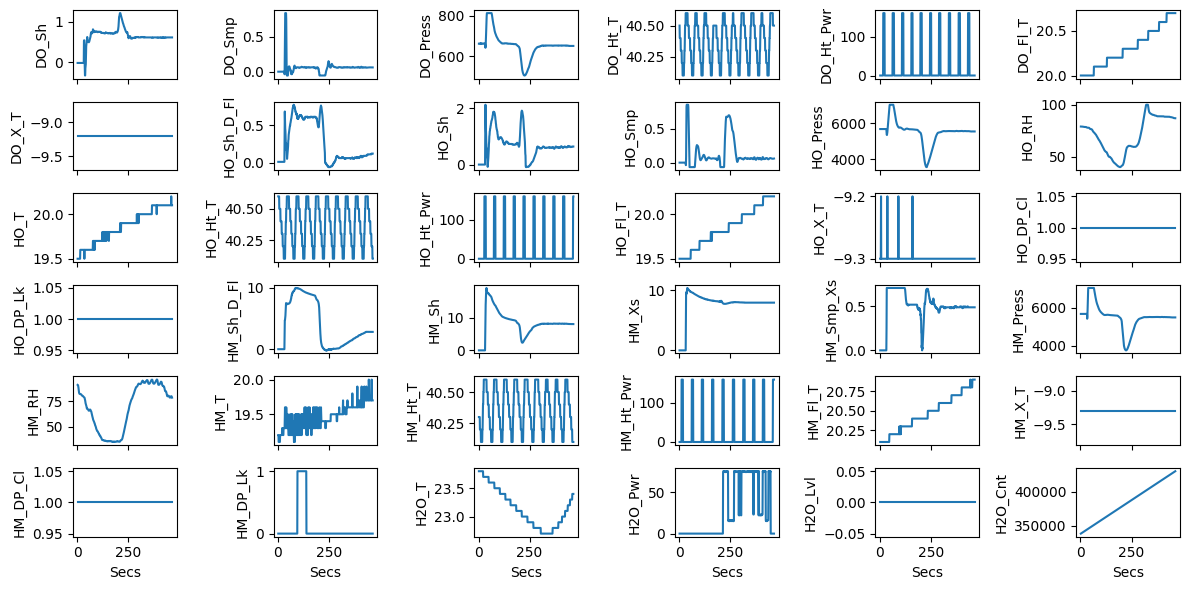

In [95]:
fig,axes = plt.subplots(6,6, sharex=True, figsize=(12, 6))
ks = d.keys()
for i,ax in enumerate(axes.ravel()):
    k = ks[i+3]
    ax.plot(d['Secs'], d[k])
    ax.set_ylabel(k)
    if i>29:
        ax.set_xlabel('Secs')
fig.tight_layout()
plt.savefig('./figures/all.png', dpi=300)